In [5]:
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import seaborn as sns
sns.set()
# sns.set_context("poster")
import numpy as np

In [6]:
labels = [
    "Random",
    "DRRN",
    "NPAE Flan-T5",
    "Flan-T5",
    "GFlan-T5"
]
colors = [sns.color_palette("deep")[i] for i in range(len(labels))]
base_colors = [sns.color_palette("pastel")[i] for i in range(len(labels))]

In [75]:
def export_plot(name, y, errors, base=None):
    import math
    fig, ax = plt.subplots(figsize=(20,15))
    plt.ylim([0, 1.0])
    if base is not None:
        ax.bar(labels, base, color=base_colors)
        for idx, _b in enumerate(base):
            text_y = max(_b, y[idx])
            text_y = text_y - 0.05 if text_y + 0.05 > 1.0 else text_y + 0.05 
            ax.text(idx-0.2, text_y, f'{round((y[idx]-base[idx])/base[idx]*100)}%', fontsize=50, color="#444444") #, c=colors[idx])
    ax.bar(labels, y, yerr=errors, color=colors, error_kw=dict(ecolor="#444444", elinewidth=5))
    sns.despine()
    plt.yticks(fontsize=40, color="#444444")
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    plt.savefig(f"{name}.png", bbox_inches='tight', dpi=100)

In [80]:
def per_task_plot(base, finetuned):
    import math
    fig, ax = plt.subplots(figsize=(20,15))
    plt.ylim([0, 1.0])
    X = np.arange(len(base))
    ax.bar(X, base, width = 0.25)
    ax.bar(X+0.25, finetuned, width = 0.25)
    sns.despine()
    plt.yticks(fontsize=40, color="#444444")
    plt.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are off
    ax.legend(labels=['Flan-T5', 'GFlan-T5'], fontsize=40)
    plt.savefig(f"plots/per_task.png", bbox_inches='tight', dpi=100)

# No change

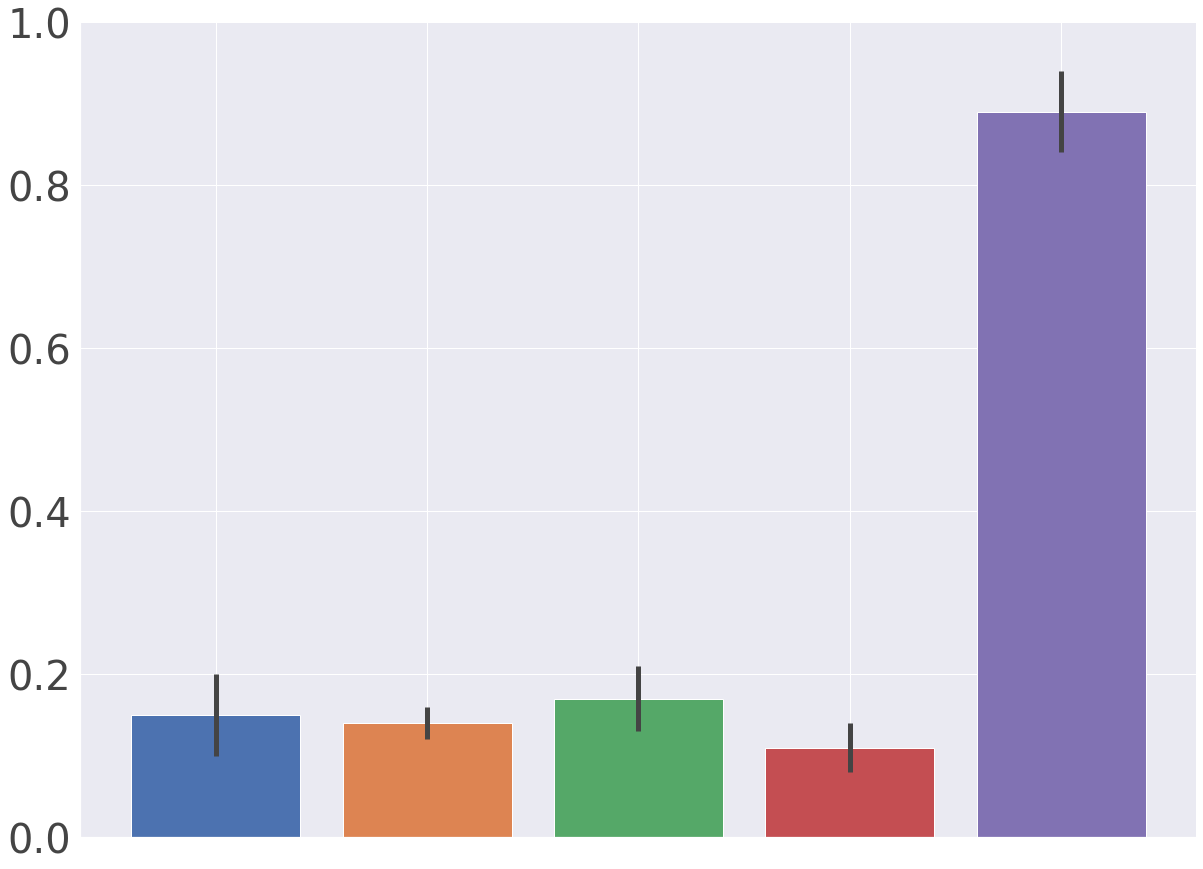

In [55]:
y = [
    0.15,
    0.14,
    0.17,
    0.11,
    0.89
]

errors = [
    0.05,
    0.02,
    0.04,
    0.03,
    0.05
]
export_plot("plots/no-change", y, errors)

# Out-of-voc

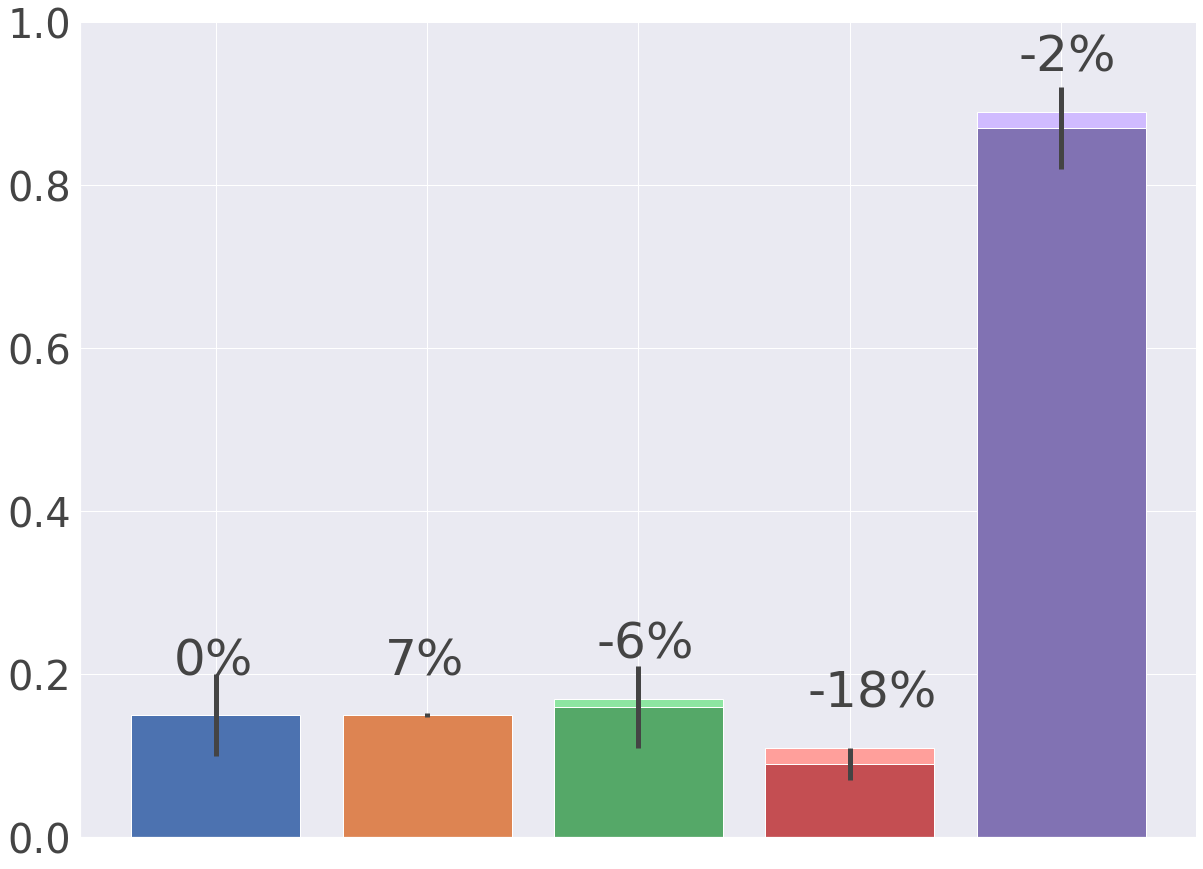

In [76]:
y = [
    0.15,
    0.15,
    0.16,
    0.09,
    0.87
]

base = [
    0.15,
    0.14,
    0.17,
    0.11,
    0.89
]

errors = [
    0.05,
    0.003,
    0.05,
    0.02,
    0.05
]
export_plot("plots/out-of-voc", y, errors, base)

# Invented

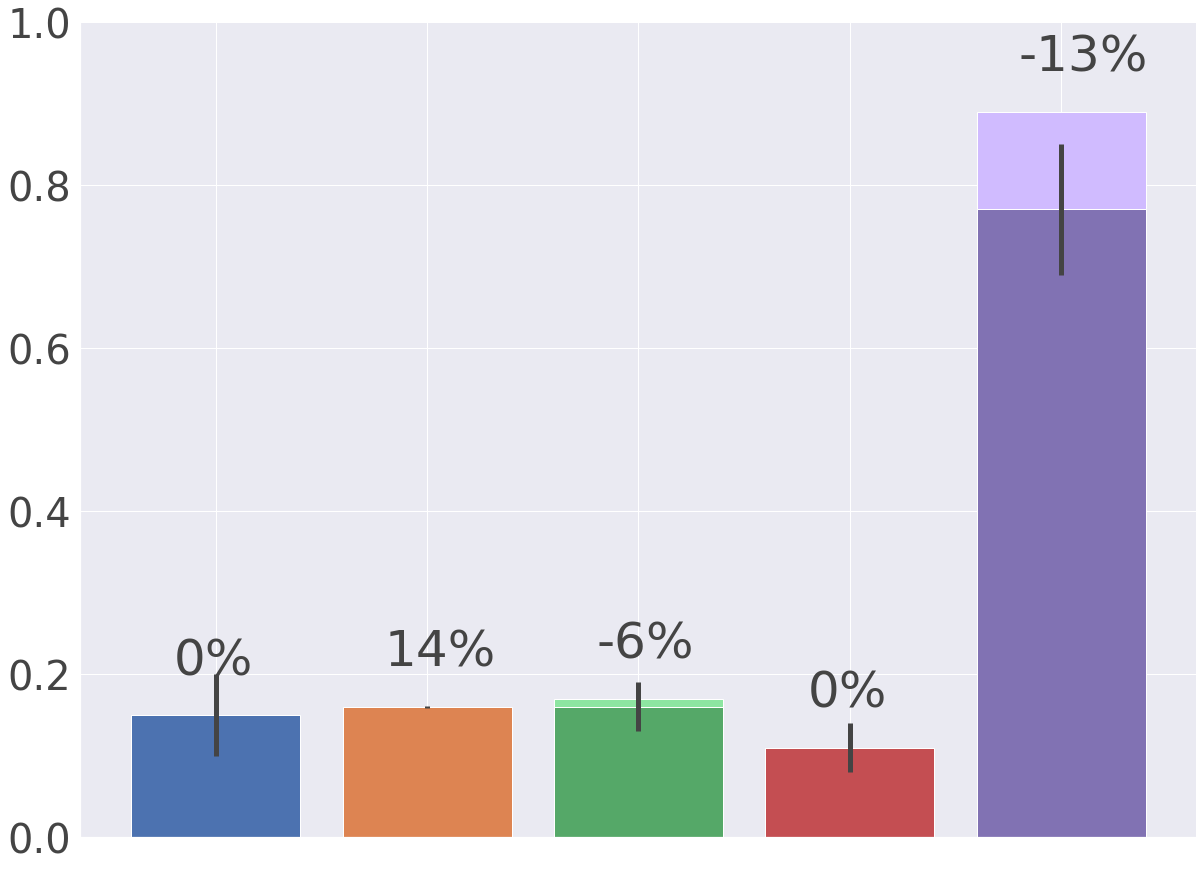

In [71]:
y = [
    0.15,
    0.16,
    0.16,
    0.11,
    0.77
]

base = [
    0.15,
    0.14,
    0.17,
    0.11,
    0.89
]

errors = [
    0.05,
    0.001,
    0.03,
    0.03,
    0.08
]
export_plot("plots/invented", y, errors, base)

# Then/after

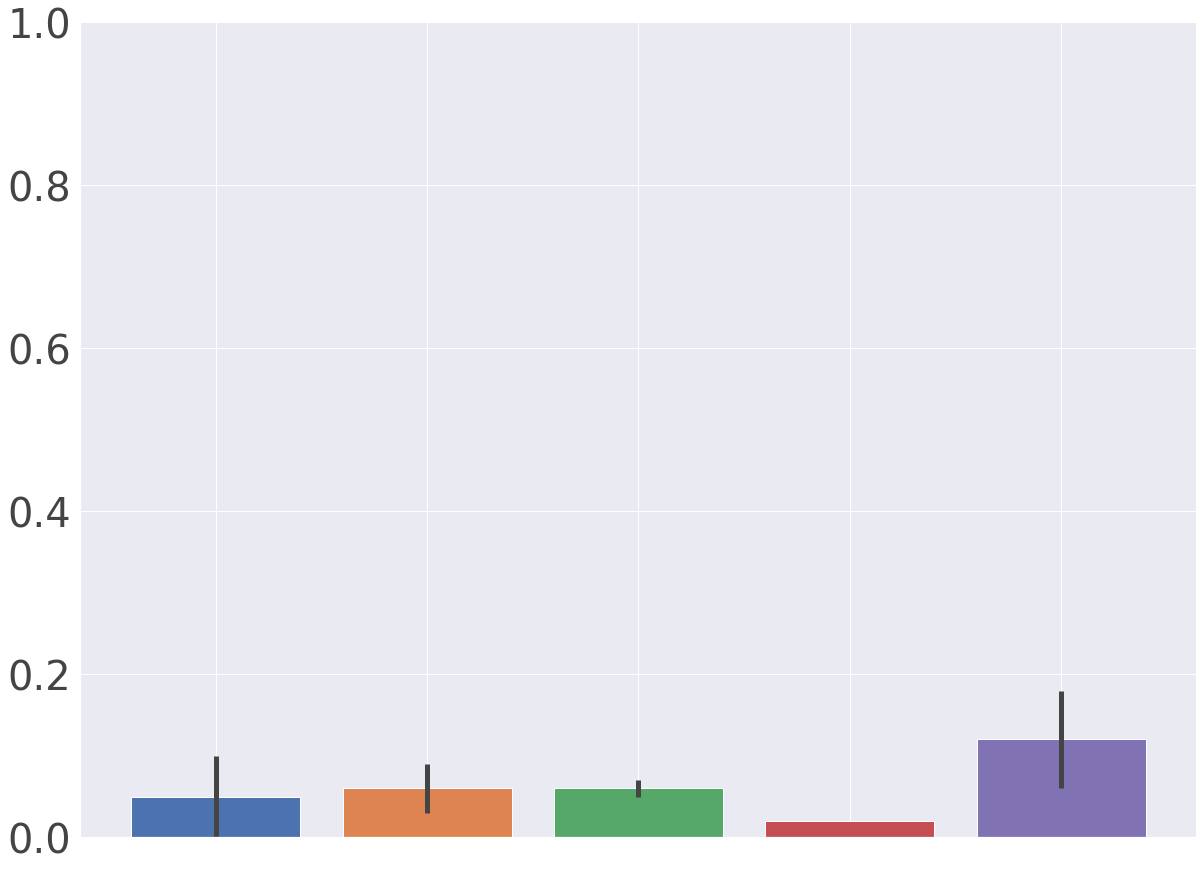

In [63]:
y = [
    0.05,
    0.06,
    0.06,
    0.02,
    0.12
]

errors = [
    0.05,
    0.03,
    0.01,
    0.0,
    0.06
]
export_plot("plots/then-after", y, errors)

# Synonyms actions

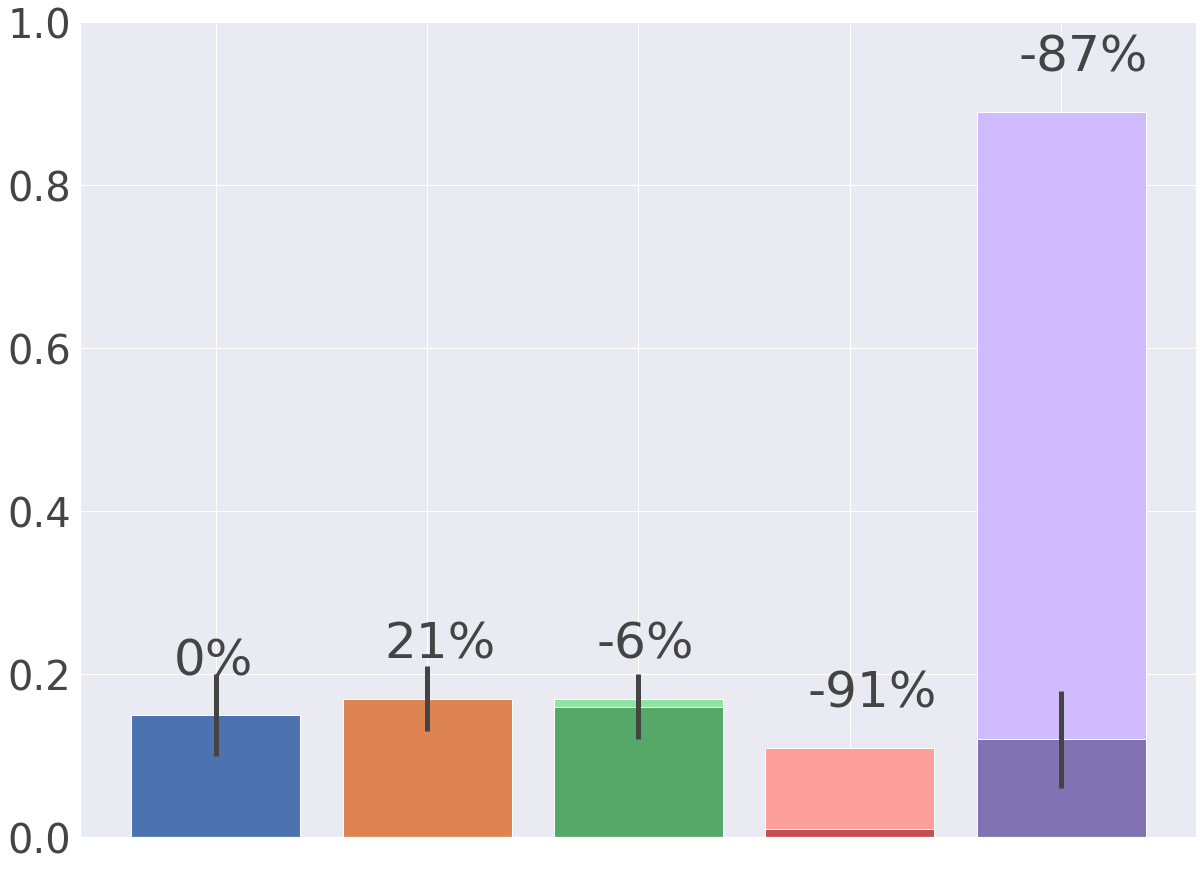

In [72]:
y = [
    0.15,
    0.17,
    0.16,
    0.01,
    0.12
]

base = [
    0.15,
    0.14,
    0.17,
    0.11,
    0.89
]

errors = [
    0.05,
    0.04,
    0.04,
    0.00,
    0.06
]
export_plot("plots/synonyms-actions", y, errors, base)

# French

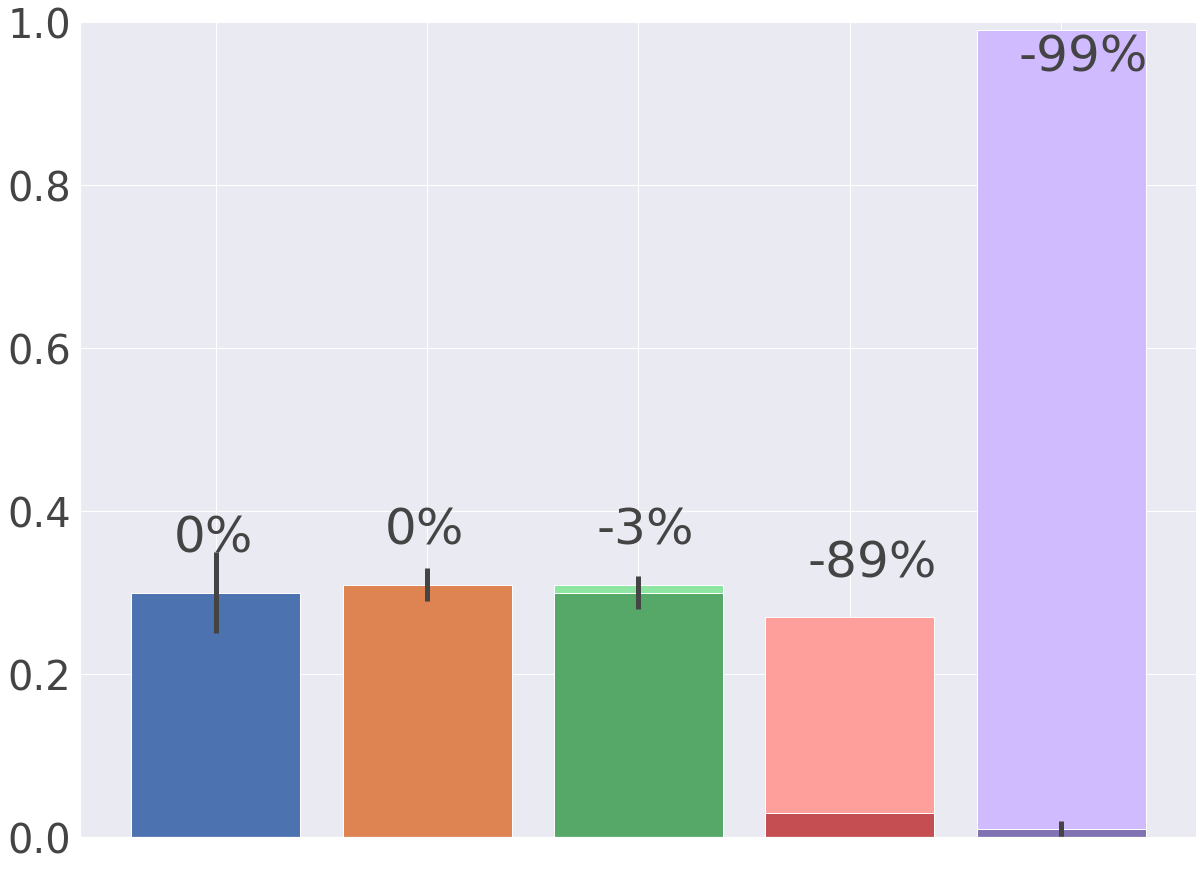

In [77]:
y = [
    0.3,
    0.31,
    0.3,
    0.03,
    0.01
]

base = [
    0.3,
    0.31,
    0.31,
    0.27,
    0.99
]

errors = [
    0.05,
    0.02,
    0.02,
    0.0,
    0.01
]
export_plot("plots/french", y, errors, base=base)

# Per task

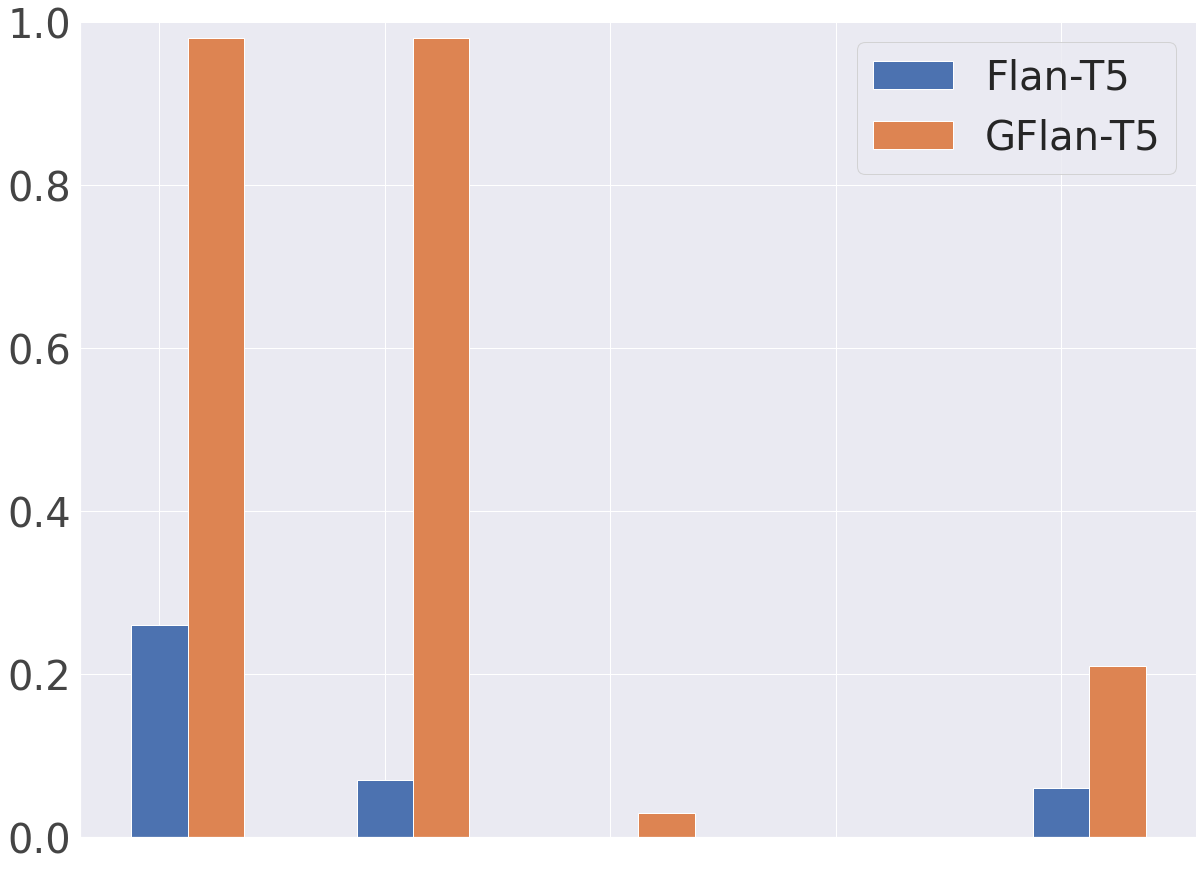

In [81]:
vanilla = [
    0.26,
    0.07,
    0.0,
    0.0,
    0.06   
]

finetuned = [
    0.98,
    0.98,
    0.03,
    0.0,
    0.21   
]

per_task_plot(vanilla, finetuned)